# t-тест для двух независимых выборок

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

df = pd.read_csv('Data/Running.csv')
df.head()

,Athlete,MileMinDur
0,0,0:06:21
1,0,0:07:00
2,0,0:12:44
3,1,0:06:25
4,1,0:07:24


**Athlete** - является студент спортсменом или нет

**MileMinDur** - время, за которое пробегает студент 1 милю

Переведем время в колонке *MileMinDur* в секунды и запишем в новую колонку.

In [2]:
df['MileSecDur'] = df['MileMinDur'].apply(lambda x: int(x.split(':')[1])*60 + int(x.split(':')[2]))

1. Для использования t-теста нам нужно проверить, что наши наблюдаемые данные распределены нормально (атлеты и неатлеты).

In [3]:
athletes = df[df['Athlete'] == 1]['MileSecDur']
non_athletes = df[df['Athlete'] == 0]['MileSecDur']

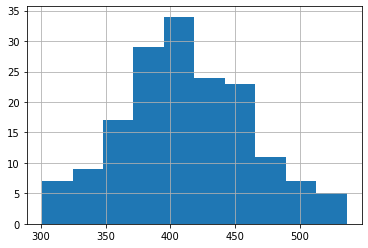

In [4]:
athletes.hist();

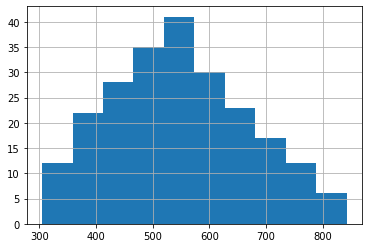

In [5]:
non_athletes.hist();

2. Также необходимо проверить равенство дисперсий наших выборок.

In [6]:
athletes.var()

2444.858853596203

In [7]:
non_athletes.var()

14802.27848574238

Мы видим, что наши дисперсии очень разные. Но это не беда. Будем использовать не классический t-критерий Стьюдента с поправкой Уэлча (будем рассчитвать по-другому степени свободы).

### Поправка Уэлча
$
\begin{align}
df = \frac{(V_1 + V_2)^2}{\frac{V^2_1}{n_1 - 1} + \frac{V^2_2}{n_2 - 1}}
\end{align}
$

$
V_1 = \frac{s^2_1}{n_1}
$

$
V_2 = \frac{s^2_2}{n_2}
$

In [8]:
n_1 = len(non_athletes) #длина выборки неспортсменов
n_2 = len(athletes) #длина выборки спортсменов
print(n_1, n_2)

226 166


In [9]:
var_1 = non_athletes.var()
var_2 = athletes.var()
print(var_1, var_2)

14802.27848574238 2444.858853596203


In [10]:
v_1 = var_1/n_1
v_2 = var_2/n_2

df_welch = (v_1 + v_2)**2 / (v_1**2 / (n_1 - 1) + v_2**2 / (n_2 - 1))
print(df_welch)
print(int(df_welch))

315.7925948972666
315


### Параметры теста:
* Двусторонний тест
* alpha = 0.05
* df = 315
* Критическое значение t-критерия: ±1.9667
* Критическая область: (-∞, -1.9667] ∪ [1.9667, ∞)

In [11]:
def hypothesis_check(t_obs, t_critical):
    if abs(t_obs) > t_critical:
        print('Отвергаем Н0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0')
        
t_critical = 1.9667

$
\begin{align}
s_{(M_1 - M_2)} = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}
\end{align}
$

In [12]:
s_m1_m2 = np.sqrt(var_1/n_1 + var_2/n_2)
print(s_m1_m2)

8.956833862596019


$
\begin{align}
t = \frac{(M_1 - M_2) - (\mu_1 - \mu_2)}{s_{(M_1 - M_2)}}
\end{align}
$


In [13]:
mean_1 = non_athletes.mean()
mean_2 = athletes.mean()
print(mean_1, mean_2)

546.1017699115044 411.31325301204816


In [14]:
t = (mean_1 - mean_2) / s_m1_m2
print(t)

15.048678915697742


In [15]:
hypothesis_check(t, t_critical)

Отвергаем Н0. Разница между средними статистически значима.


Теперь посмотрим, как найти t-критерий для независимых выборок при помощи функций из библиотеки *scipy.stats*.

In [16]:
scipy.stats.ttest_ind_from_stats(mean_1, np.sqrt(var_1), n_1, 
                                 mean_2, np.sqrt(var_2), n_2, 
                                 equal_var=False)

Ttest_indResult(statistic=15.048678915697742, pvalue=5.824578890260176e-39)

Второй способ расчета.

In [17]:
scipy.stats.ttest_ind(non_athletes, athletes, equal_var=False)

Ttest_indResult(statistic=15.048678915697742, pvalue=5.82457889026026e-39)

Теперь давайте рассчитаем доверительный интервал для нашей разницы между средними (в каком интервале она находится). Будем также использовать 95%-ный интервал.

$CI = (M_1 - M_2) \pm t * S(M_1 - M_2)$

In [18]:
CI_bottom = (mean_1 - mean_2) - t_critical * s_m1_m2
print(CI_bottom)

117.17311174188869


In [19]:
CI_top = (mean_1 - mean_2) + t_critical * s_m1_m2
print(CI_top)

152.40392205702386


# Расчет корреляции Пирсона в scipy.stats

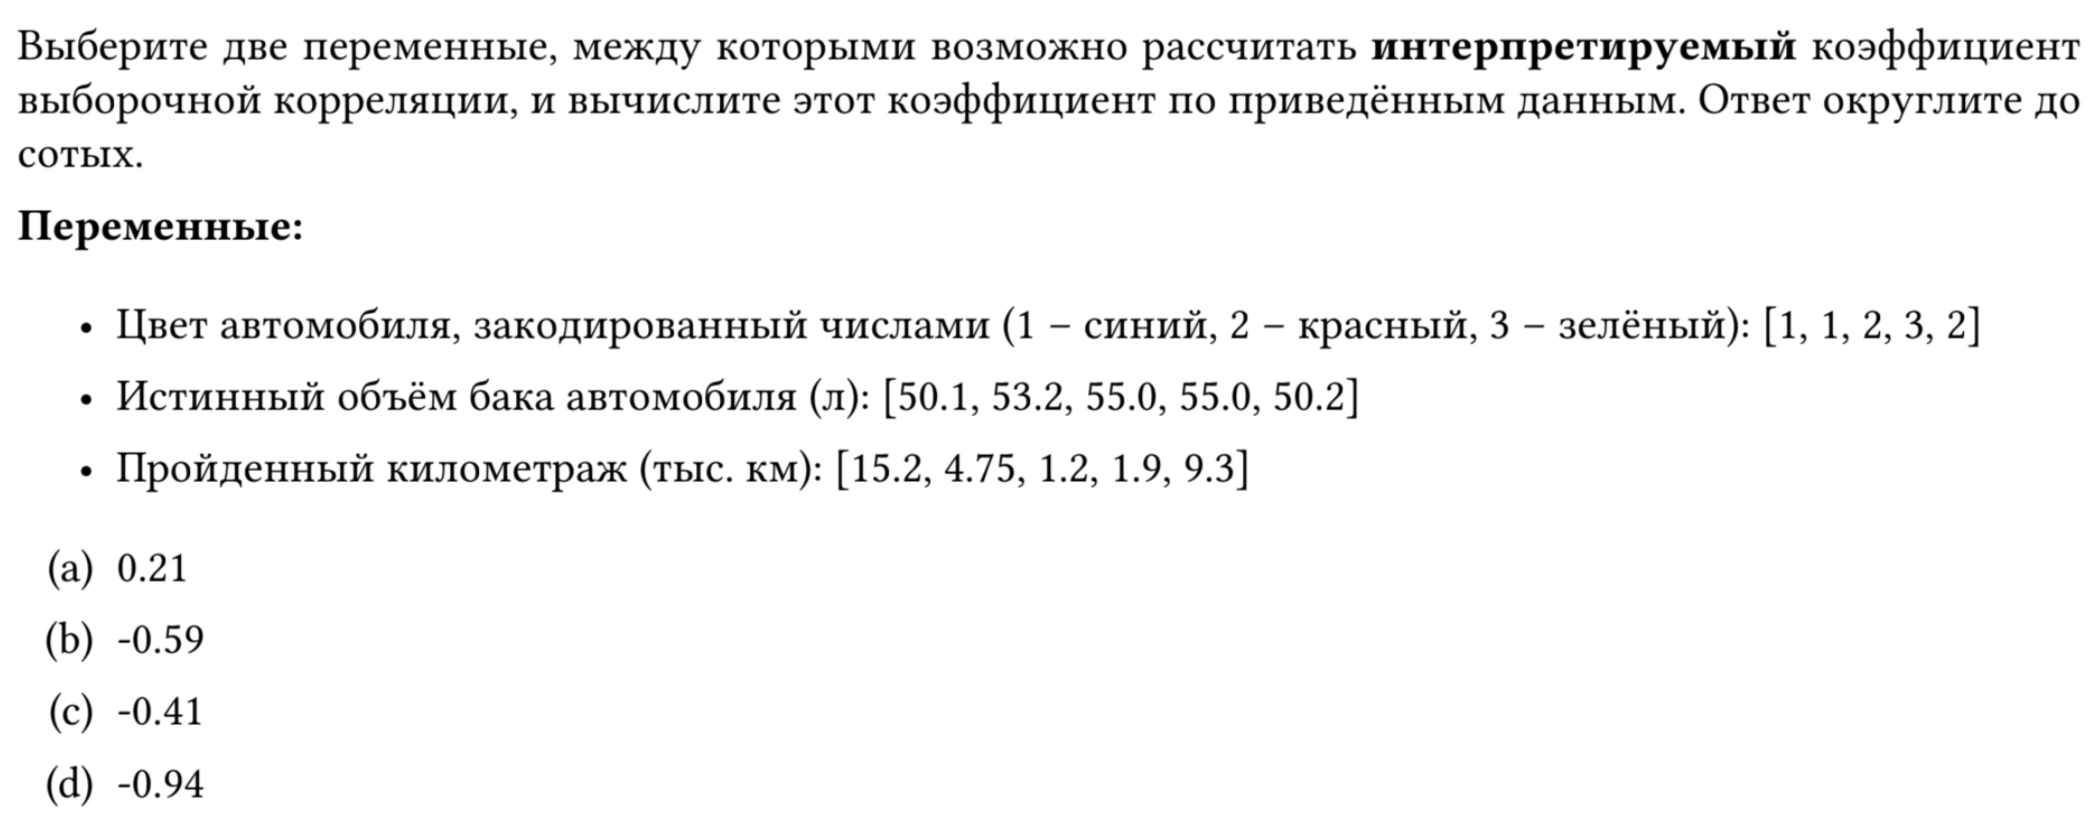

In [20]:
from IPython.display import Image
Image('images/pearsonr.png')

In [21]:
v = [50.1, 53.2, 55.0, 55.0, 50.2]
km = [15.2, 4.75, 1.2, 1.9, 9.3]
round(scipy.stats.pearsonr(v, km)[0], 2)

-0.94

# Критерий Хи-квадрат

In [22]:
df = pd.read_csv('Data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1


**sex** - категориальная переменная, является ли поступивший пациент мужчиной (кодируется 1) или женщиной (кодируется 0)

**target** - было ли диагностировано сердечно-сосудистое заболевание у пациента или нет

Будем тестировать гипотезу о независимости этих двух категориальных переменных.

In [23]:
alpha = 0.01

In [24]:
ct_o = df.groupby('sex')['target'].value_counts().unstack()
ct_o #таблица сопряженности (contingency table for observed)

target,0,1
sex,,
0,24,72
1,114,93


$
dof = (R - 1)(C - 1)
$

In [25]:
dof = (ct_o.shape[0] - 1) * (ct_o.shape[1] - 1)
dof

1

In [26]:
critical_value = 6.63 #для alpha = 0.01 и dof = 1

Рассчитаем наши теоретические частоты вручную.

In [27]:
n_total = ct_o.sum().sum()
print(n_total)

303


In [28]:
n_target_0 = ct_o[0].sum()
n_target_1 = ct_o[1].sum()
print(n_target_0, n_target_1)

138 165


In [29]:
p_target_0 = n_target_0 / n_total
p_target_1 = n_target_1 / n_total
print(p_target_0, p_target_1)

0.45544554455445546 0.5445544554455446


In [30]:
n_women = ct_o.iloc[0].sum()
n_men = ct_o.iloc[1].sum()
print(n_women, n_men)

96 207


In [31]:
#теоретические частоты для женщин
f_e_target_0_women = n_women * p_target_0
f_e_target_1_women = n_women * p_target_1
print(f_e_target_0_women, f_e_target_1_women)

43.722772277227726 52.27722772277228


In [32]:
#теоретические частоты для мужчин
f_e_target_0_men = n_men * p_target_0
f_e_target_1_men = n_men * p_target_1
print(f_e_target_0_men, f_e_target_1_men)

94.27722772277228 112.72277227722773


In [33]:
print(f_e_target_0_women + f_e_target_1_women + 
      f_e_target_0_men + f_e_target_1_men)

303.0


In [34]:
ct_e = np.array([[f_e_target_0_women, f_e_target_1_women], 
                 [f_e_target_0_men, f_e_target_1_men]])

In [35]:
print(ct_e)

[[ 43.72277228  52.27722772]
 [ 94.27722772 112.72277228]]


$
f_e = \frac{f_cf_r}{n}
$

In [36]:
round(ct_o[0].sum() * ct_o.iloc[0].sum() / n_total)

44

$
\chi^2 = \sum{\frac{(f_o - f_e)^2}{f_e}}
$

In [37]:
chi_square = ((ct_o - ct_e)**2/ct_e).sum().sum()
print(chi_square)

23.914383914761984


In [38]:
chi_square > critical_value

True

In [39]:
scipy.stats.chi2_contingency(ct_o, correction=False)

(23.914383914761988,
 1.0071642033238865e-06,
 1,
 array([[ 43.72277228,  52.27722772],
        [ 94.27722772, 112.72277228]]))

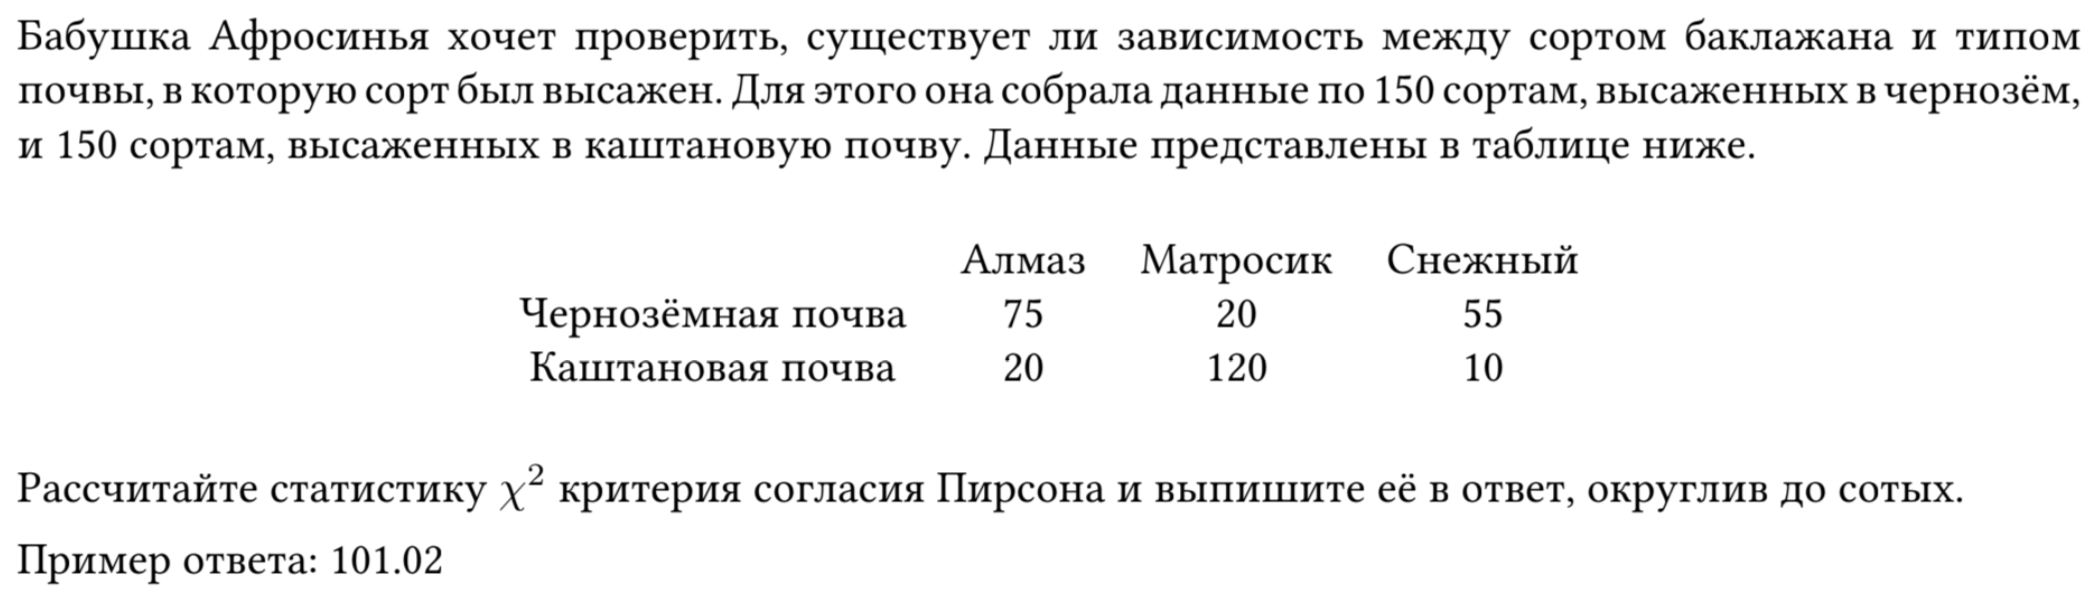

In [40]:
Image('images/chi_squared.png')

In [41]:
# your code


## Задание 1.

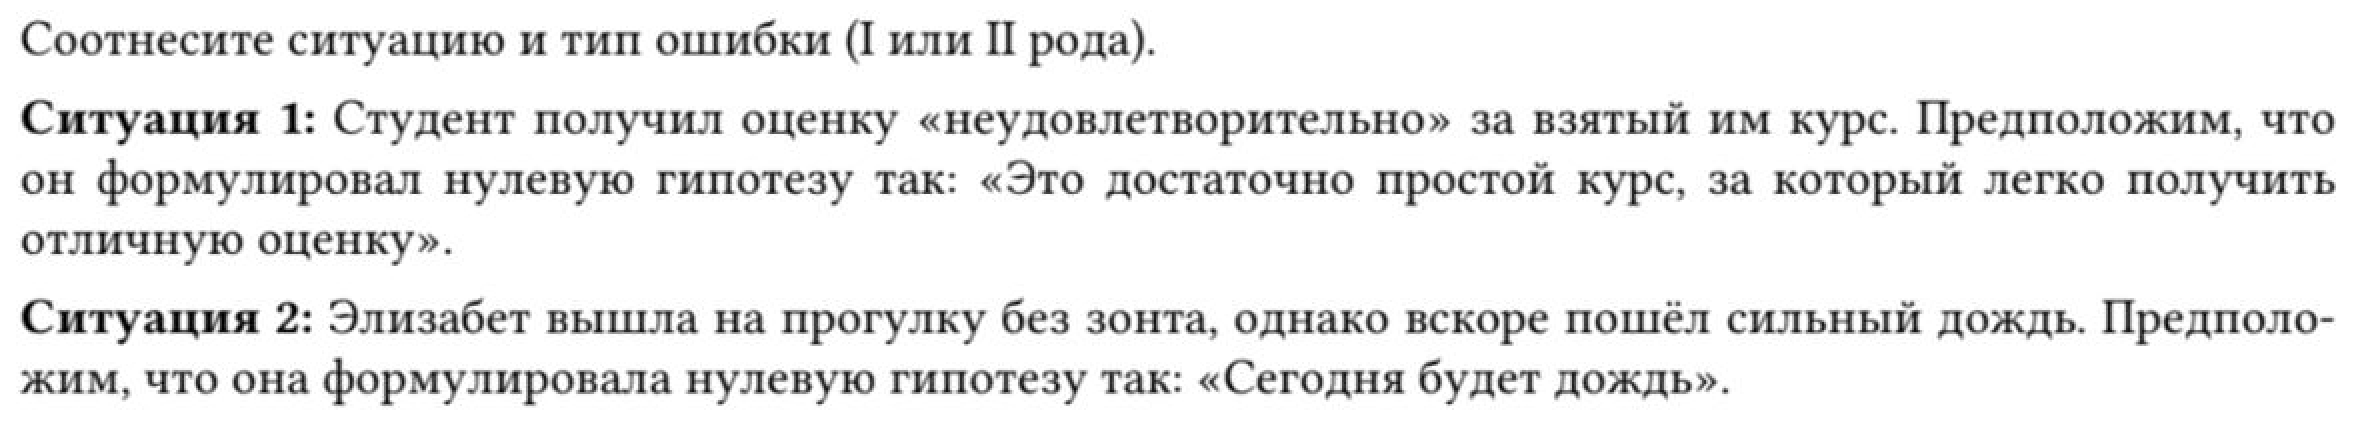

In [42]:
Image('images/1_2_errors.png')

## Задание 2.

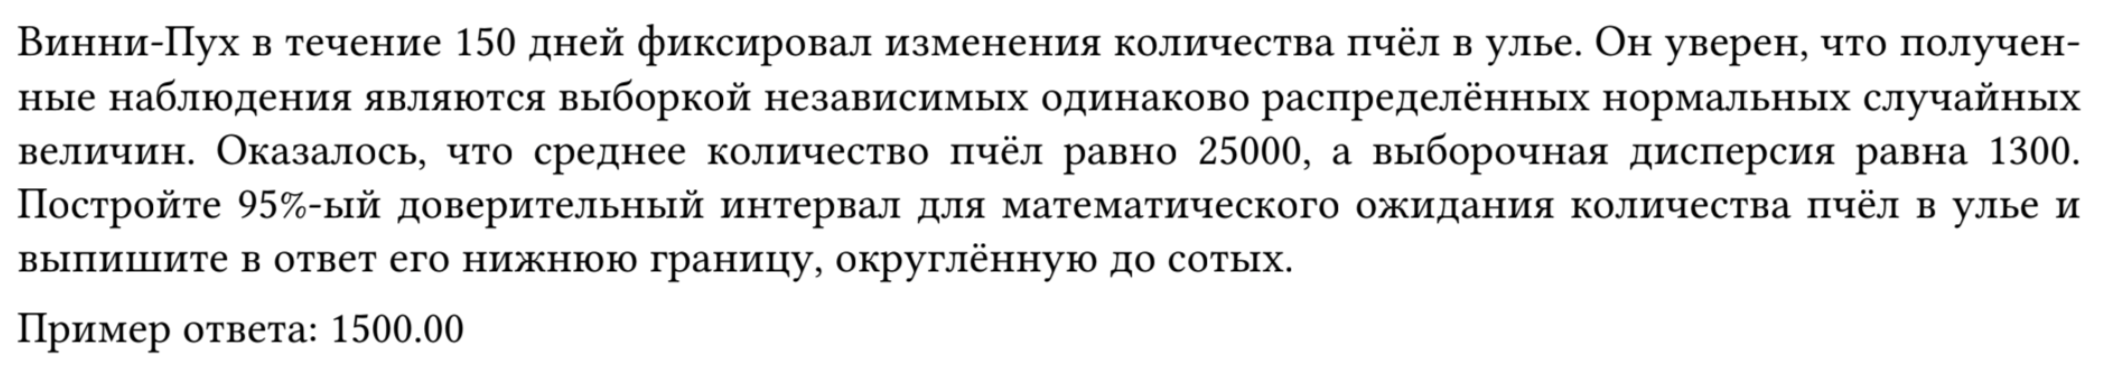

In [43]:
Image('images/CI.png')

При уровне статистической значимости $\alpha = 0.05, z_{crit} = \pm 1.96$

## Задание 3.

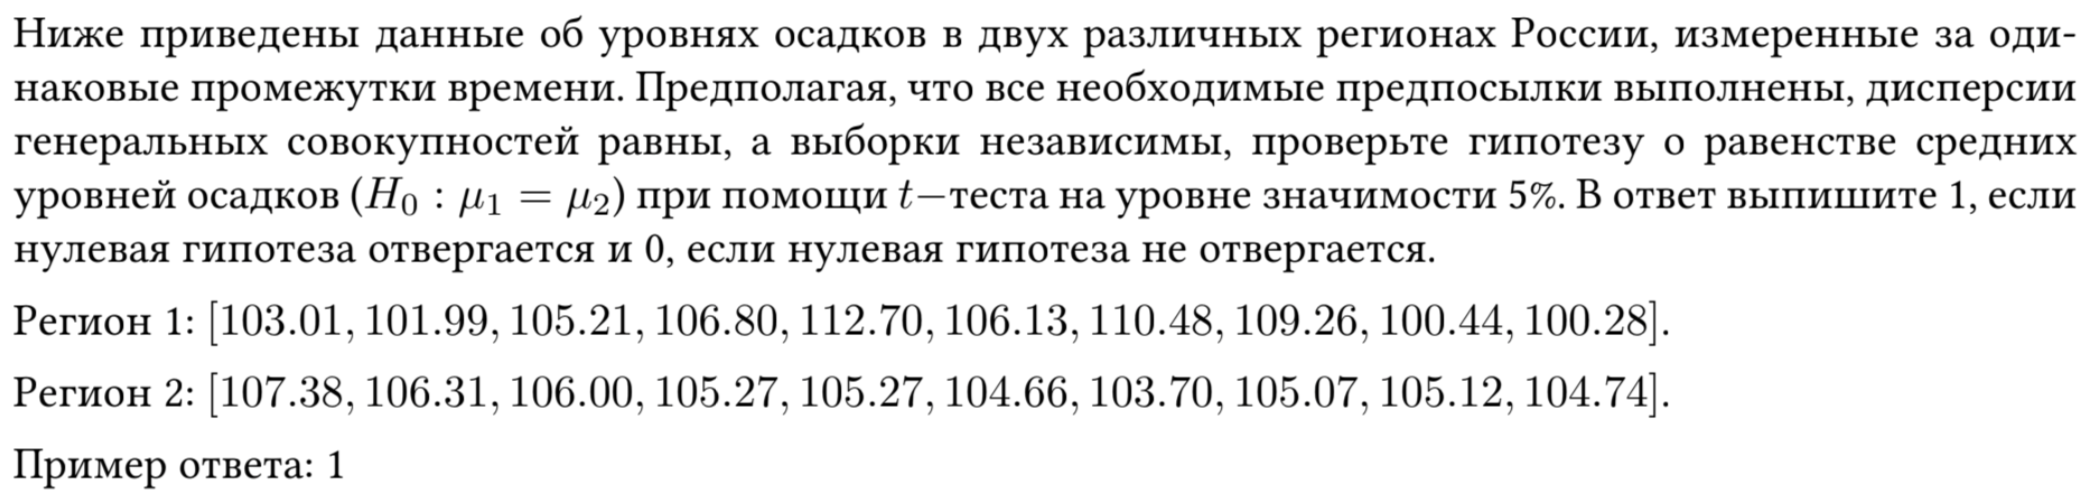

In [44]:
Image('images/t_test_ind_samples.png')

In [45]:
region_1 = [103.01, 101.99, 105.21, 106.80, 112.70, 106.13, 110.48, 109.26, 100.44, 100.28]
region_2 = [107.38, 106.31, 106.00, 105.27, 105.27, 104.66, 103.70, 105.07, 105.12, 104.74]